# Basic Charts: US economics time series 
by Giancarlo Ruffo, Università degli Studi di Torino

In this third notebook on matplotlib we use a dataset that data scientists working with `R` know very well, because it comes with the `ggplot2` library. 

The `economics` dataset was originally created from US economic time series data collected within the [FRED](http://research.stlouisfed.org/fred2) project, namely the *Federal Reserve Economic Data*'s project by the Economic Research department of the Federal Reserve Bank of St Louis. 

Here our dataset is stored in a `csv` file, that we import into a `pandas` dataframe.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# uncomment import os below if you want to explore your local or mounted file system to locate your data
#import os

In [2]:
# uncomment below if you use it from your google colab folder, because you need to mount the `/gdrive` folder
#
#from google.colab import drive
#drive.mount('/gdrive', force_remount=True)
#%cd /gdrive

In [70]:
# path should be changed accordingly your local file system or your drive path (if you are using colab)

path = '../data/economics.csv'
dataset = pd.read_csv(path, index_col=0)

In [71]:
dataset["date"] = pd.to_datetime(dataset["date"]) 

## Description of `economics` dataset fields

We have many fields in this dataset. In this notebook we will use only the following:
- __`date`__: date of data collection
- __`pce`__: personal consumption expenditures, in billions of dollars, [FRED's data: PCE](http://research.stlouisfed.org/fred2/series/PCE)
- __`pop`__: total population, in thousands, [FRED's data: POP](https://fred.stlouisfed.org/series/POP)
- __`psavert`__: personal savings rate,, [FRED's data: PSAVERT](http://research.stlouisfed.org/fred2/series/PSAVERT/)
- __`uempmed`__: median duration of unemployment, in weeks, [FRED's data: UEMPMED](http://research.stlouisfed.org/fred2/series/UEMPMED)
- __`unemploy`__: number of unemployed in thousands, [FRED's data: UNEMPLOY](http://research.stlouisfed.org/fred2/series/UNEMPLOY)
- __`year`__: year of data collection (from `date` field)
- __`month`__: month of data collection (from `date` field)

In [72]:
dataset.head()

,date,pce,pop,psavert,uempmed,unemploy,year,month
1,1967-07-01,507.4,198712,12.5,4.5,2944,1967,7
2,1967-08-01,510.5,198911,12.5,4.7,2945,1967,8
3,1967-09-01,516.3,199113,11.7,4.6,2958,1967,9
4,1967-10-01,512.9,199311,12.5,4.9,3143,1967,10
5,1967-11-01,518.1,199498,12.5,4.7,3066,1967,11


## Scatter plot

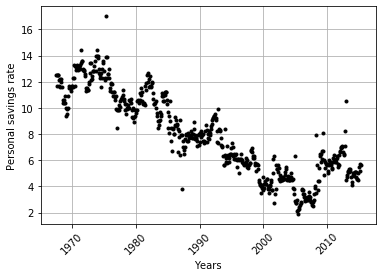

In [74]:
import matplotlib.dates as mdates
import datetime

plt.plot(dataset.date, dataset.psavert, "k.")
plt.xlabel('Years')
plt.ylabel('Personal savings rate')
ax = plt.gca()
ax.tick_params(axis ='x', rotation = 45) 
ax.grid(True)
plt.show()

## Line chart

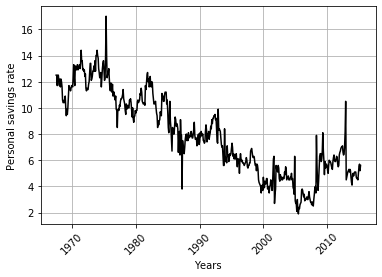

In [75]:
plt.plot(dataset.date, dataset.psavert, "k-")
plt.xlabel('Years')
plt.ylabel('Personal savings rate')
ax = plt.gca()
ax.tick_params(axis ='x', rotation = 45) 
ax.grid(True)
plt.show()

## Area chart

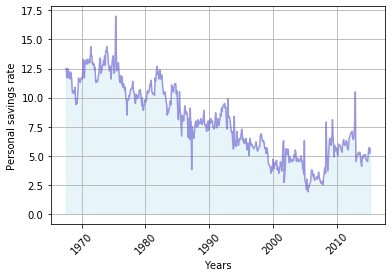

In [76]:
plt.fill_between(dataset.date, dataset.psavert, color="skyblue", alpha=0.2)
plt.plot(dataset.date, dataset.psavert, color="Slateblue", alpha=0.6)
plt.xlabel('Years')
plt.ylabel('Personal savings rate')
ax = plt.gca()
ax.tick_params(axis ='x', rotation = 45) 
ax.grid(True)
plt.show()

## Bar chart

In [101]:
dataset_subset = dataset[(dataset.year >= 2003) & (dataset.year <= 2007)]

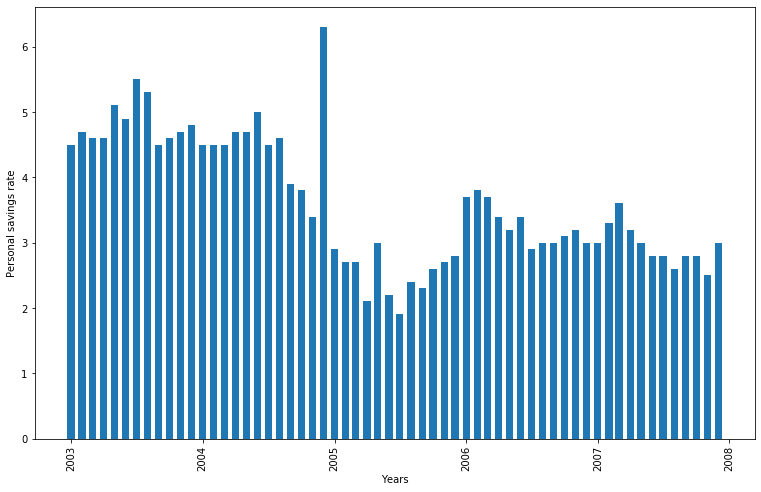

In [118]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
plt.bar(dataset_subset.date,dataset_subset.psavert,width=20)

plt.xlabel('Years')
plt.ylabel('Personal savings rate')

ax.tick_params(axis ='x', rotation = 90) 
plt.show()

In [121]:
pivot_t = pd.pivot_table(dataset_subset,index=["year"],values=["psavert"],aggfunc={'psavert': np.mean})

In [122]:
pivot_t

,psavert
year,
2003,4.816667
2004,4.533333
2005,2.525000
2006,3.283333
2007,2.950000


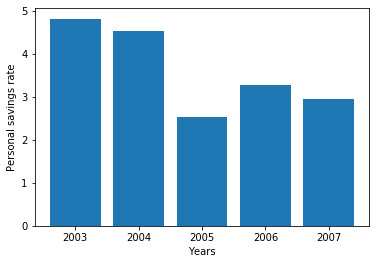

In [127]:
plt.bar(pivot_t.index,pivot_t.psavert)

plt.xlabel('Years')
plt.ylabel('Personal savings rate')

#ax.tick_params(axis ='x', rotation = 90) 
plt.show()

# Box and Whisker plot

In [0]:
df_box = dataset[dataset.year<=1990]

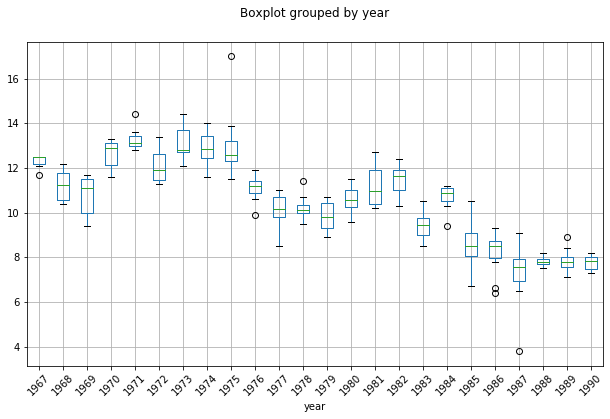

In [0]:
df_box.boxplot(column = 'psavert', by = 'year', figsize=(10,6));
plt.title('')
ax = plt.gca()
ax.tick_params(axis ='x', rotation = 45) 
plt.show()

# Plotting Multiline chart

In [0]:
months = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [0]:
# create a color palette
palette = plt.get_cmap('Paired')

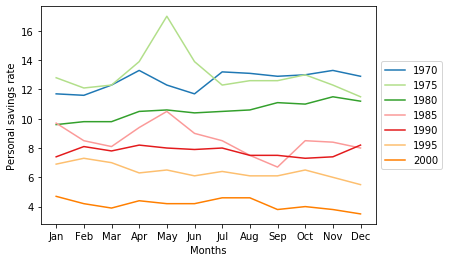

In [0]:
num = 0
plots =[]

for y in range(1970,2005,5):
  num+=1
  line = dataset[dataset.year == y]
  p = plt.plot(months,line.psavert,'b-', label=str(y), color=palette(num))
  plots += p

plt.xlabel('Months')
plt.ylabel('Personal savings rate')
plt.legend(handles=plots)

ax = plt.gca()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Plotting small multiples


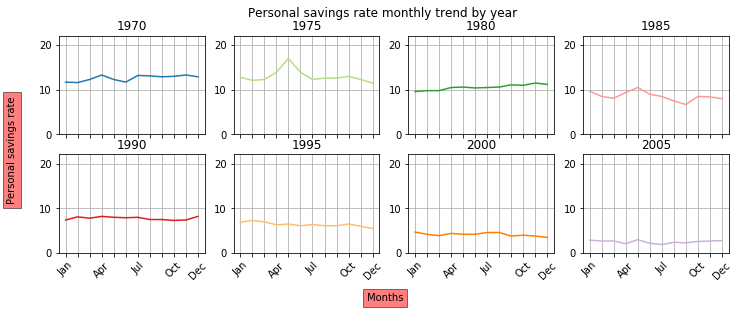

In [0]:
fig,ax=plt.subplots(nrows=2,ncols=4, figsize=(12,4))
min_y = 0
max_y = max(dataset.psavert)*1.3

num = 0

for y in range(1970,2010,5):
  r = 0
  if (num >=4) : r = 1
  c=num%4
  num+=1
  
  ax[r,c].plot(months,dataset[dataset.year == y].psavert, color=palette(num))
  ax[r,c].set_title(str(y))
  ax[r,c].set_ylim(min_y,max_y)
  ax[r,c].grid(True)
  if (r == 0):
    ax[r,c].set_xticklabels([])
  else:
    ax[r,c].set_xticklabels(['Jan','','','Apr','','','Jul','','','Oct','','Dec'])
    ax[r,c].tick_params(axis ='x', rotation = 45) 

plt.suptitle("Personal savings rate monthly trend by year")

plt.text(-17, -10, 'Months', ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5))
plt.text(-48, 23, 'Personal savings rate', ha='center', va='center', rotation='vertical', bbox=dict(facecolor='red', alpha=0.5))

plt.show()
